# IRIS DATASET

In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


## Loading the dataset 


In [8]:
iris = pd.read_csv("C:/Users/kulsum kamal/Downloads/Iris.csv")

### Preview of data

In [9]:
iris.head() #first few values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.tail() #last few values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
iris.shape

(150, 6)

In [18]:
iris.describe() #full dataset description

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
iris.isnull().sum() #checking for missing data

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
iris.columns #column heads

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Data Visualisation

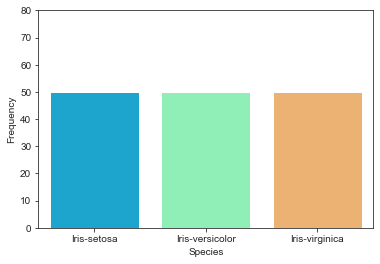

In [36]:
#target variable boxplots
sns.set_style('ticks')
sns.set_palette('Set1')
sns.countplot(data = iris, x = 'Species', palette = 'rainbow')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.ylim([0,80])
plt.show()

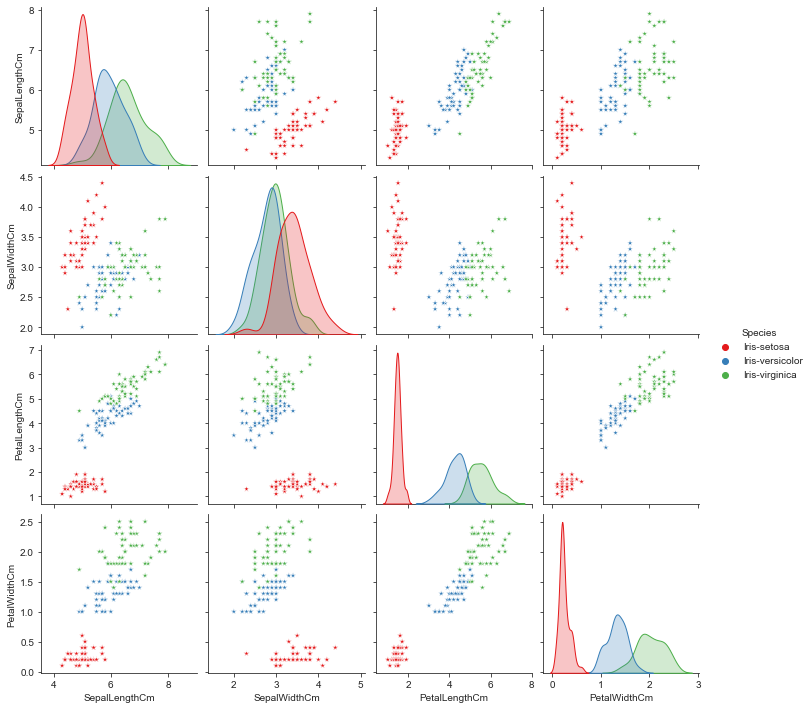

In [35]:
temp = iris.drop('Id', axis = 1)
s = sns.pairplot(temp, hue = 'Species', markers = '*')
plt.show()

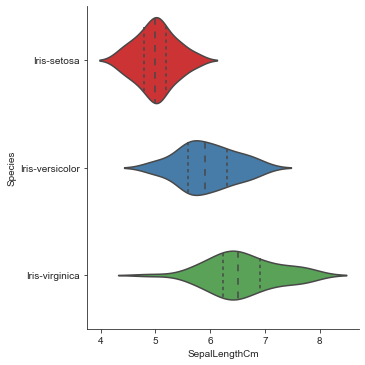

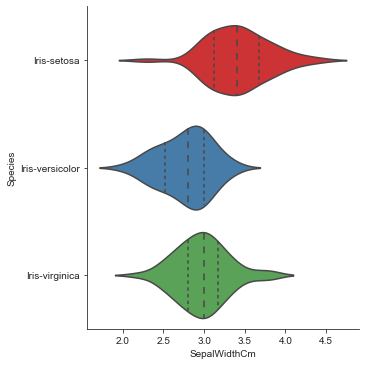

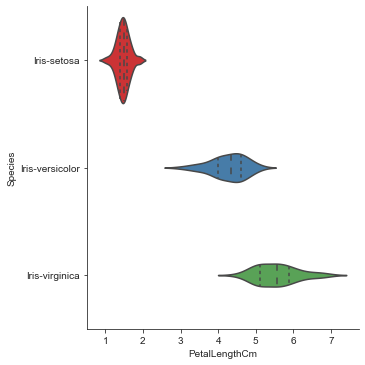

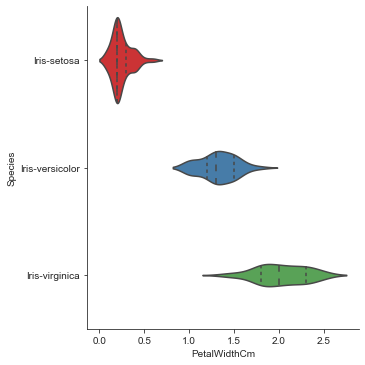

In [34]:
s = sns.catplot(x = 'SepalLengthCm', y = 'Species', kind = 'violin', data = temp, inner = 'quartile')
plt.show()

s = sns.catplot(x = 'SepalWidthCm', y = 'Species', kind = 'violin', data = temp, inner = 'quartile')
plt.show()

s = sns.catplot(x = 'PetalLengthCm', y = 'Species', kind = 'violin', data = temp, inner = 'quartile')
plt.show()

s = sns.catplot(x = 'PetalWidthCm', y = 'Species', kind = 'violin', data = temp, inner = 'quartile')
plt.show()

## Modeling with sci-kit learn

In [32]:
X = iris.drop(['Id', 'Species'], axis = 1)
y = iris['Species']

### Splitting the dataset into training and testing data

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 6)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(90, 4)
(90,)
(60, 4)
(60,)


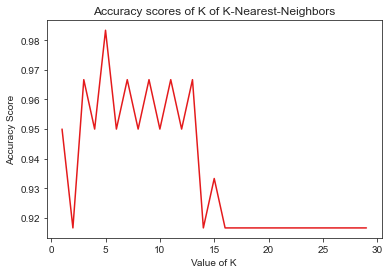

In [45]:
#testing with different n values 
K = range(1,30)
scores = []

for k in K:
    kc = KNeighborsClassifier(n_neighbors = k)
    kc.fit(X_train, y_train)
    pred = kc.predict(X_valid)
    scores.append(accuracy_score(y_valid, pred))
    
plt.plot(K, scores)
plt.title('Accuracy scores of K of K-Nearest-Neighbors')
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.show()

### KNN with k=5 is hence used for modeling the Iris Species prediction:

Now, on observing that k=5 proves to give a high accuracy score, the entire dataset is used to fit the model.

In [48]:
kc = KNeighborsClassifier(n_neighbors = 5)
kc.fit(X, y)

# Using an out-of-sample set of values for making a prediction.
example = [[6, 3, 6, 2]]
print(kc.predict(example))

['Iris-virginica']
